# Arboles de Decisión

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

# 1.

In [145]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [146]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv('C:\\Users\\usuario\\Desktop\\Data set tarea 2\\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [147]:
# visualizamos las dimensiones del arreglo
data.shape

(1599, 12)

In [148]:
# realizamos el resumen estadistico del dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [149]:
# visualizamos el numero de valores faltantes
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0.5, 0, 'Nivel de calidad')

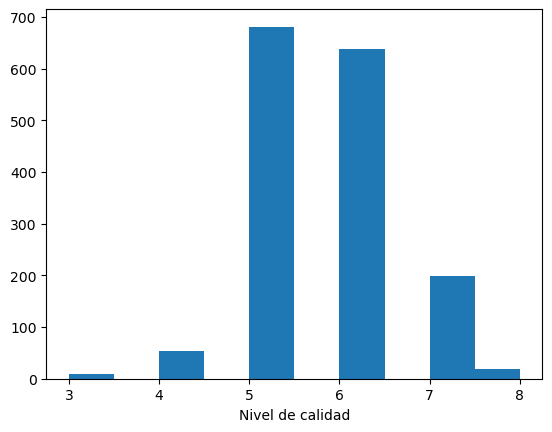

In [150]:
# visualizamos este grafico de barras que nos muestra los niveles de calidad de los vinos y la cantidad por nivel.
plt.hist(data.quality)
plt.xlabel('Nivel de calidad')

<Axes: xlabel='alcohol', ylabel='residual sugar'>

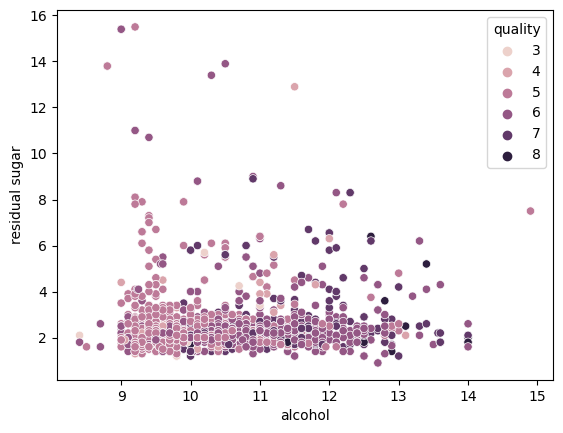

In [151]:
# visualizamos entre el contenido de alcohol, el azúcar residual y la calidad del vino. 
# Observamos que los vinos con menor contenido de azúcar residual y alcohol tienden a tener una calidad más alta
sns.scatterplot(x = "alcohol", y = "residual sugar", hue = "quality", data = data)

# 2

In [152]:
# analizando nuestro dataset nos damos cuenta de que esta completo en sus datos ademas cada una de las columnas aportan datos importantes
# para definir la calidad de el vino, sin embargo para el ejemplo vamos a eliminar las columnas ph y sulphates con el fin de limpiar el dataset
# de datos no tan relevantes.
df_sin_columnas = data.drop(columns=['chlorides', 'sulphates'])
data = df_sin_columnas


In [153]:
# comprovamos el dataset con los cambios
data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,7.4,0.700,0.00,1.9,11.0,34.0,0.9978,3.51,9.4,5
1,7.8,0.880,0.00,2.6,25.0,67.0,0.9968,3.20,9.8,5
2,7.8,0.760,0.04,2.3,15.0,54.0,0.9970,3.26,9.8,5
3,11.2,0.280,0.56,1.9,17.0,60.0,0.9980,3.16,9.8,6
4,7.4,0.700,0.00,1.9,11.0,34.0,0.9978,3.51,9.4,5
...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,17.0,106.0,0.9932,3.85,12.9,6
96,6.8,0.775,0.00,3.0,8.0,23.0,0.9965,3.45,10.7,5
97,7.0,0.500,0.25,2.0,3.0,22.0,0.9963,3.25,9.2,5
98,7.6,0.900,0.06,2.5,5.0,10.0,0.9967,3.39,9.8,5


# 3.

In [154]:
# definimos las variables de predicción y la variable objetivo
predictors_col = [col for col in data.columns if col != 'quality']
target_col = ['quality']

In [155]:
# divimos el conjunto en dos partes los datos de predicción y los datos objetivo
predictors = data[predictors_col]
target = data[target_col]

In [156]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
0,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,9.4
1,7.8,0.880,0.00,2.6,25.0,67.0,0.99680,3.20,9.8
2,7.8,0.760,0.04,2.3,15.0,54.0,0.99700,3.26,9.8
3,11.2,0.280,0.56,1.9,17.0,60.0,0.99800,3.16,9.8
4,7.4,0.700,0.00,1.9,11.0,34.0,0.99780,3.51,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.99490,3.45,10.5
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.99512,3.52,11.2
1596,6.3,0.510,0.13,2.3,29.0,40.0,0.99574,3.42,11.0
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.99547,3.57,10.2


In [157]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [158]:
# definimos una matriz de correlacion.
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,-0.153794,-0.113181,0.668047,-0.682978,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,-0.010504,0.076470,0.022026,0.234937,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,-0.060978,0.035533,0.364947,-0.541904,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.187049,0.203028,0.355283,-0.085652,0.042075
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,1.000000,0.667666,-0.021946,0.070377,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.667666,1.000000,0.071269,-0.066495,-0.205654
density,0.668047,0.022026,0.364947,0.355283,-0.021946,0.071269,1.000000,-0.341699,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,0.070377,-0.066495,-0.341699,1.000000,0.205633
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.069408,-0.205654,-0.496180,0.205633,1.000000


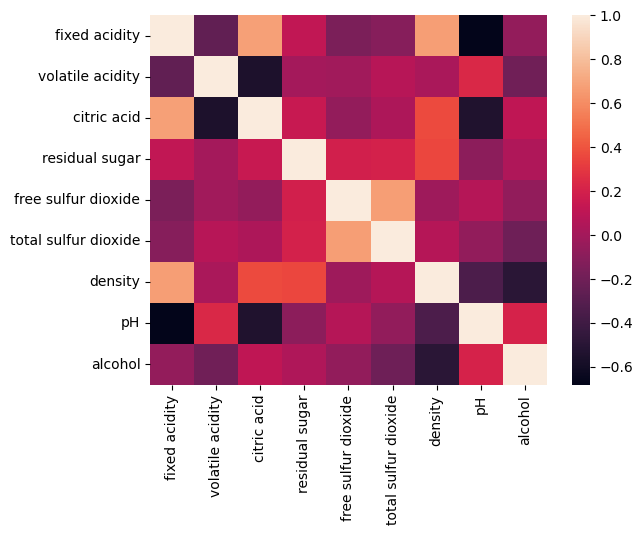

In [124]:
#visualizamos la grafica de correlacón que  permite identificar qué características están más fuertemente relacionadas entre sí.
sns.heatmap(corr)
plt.show()

# 4.

In [125]:
# divimos los datos en datos de train y de test.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

# 5.

In [126]:
# creamos un modelo de clasificación basado en árboles de decisión utilizando el algoritmo DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [127]:
# entrenamos el modelo de arbol de desición
arbol = tree.fit(X_train, y_train)

[Text(0.5142301802678189, 0.9761904761904762, 'x[8] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.343224610213611, 0.9285714285714286, 'x[5] <= 98.5\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.21457287864963503, 0.8809523809523809, 'x[1] <= 0.572\ngini = 0.564\nsamples = 641\nvalue = [5, 26, 347, 240, 23, 0]'),
 Text(0.06362709317303564, 0.8333333333333334, 'x[1] <= 0.317\ngini = 0.567\nsamples = 341\nvalue = [1, 7, 153, 163, 17, 0]'),
 Text(0.018892228424216402, 0.7857142857142857, 'x[6] <= 0.996\ngini = 0.468\nsamples = 47\nvalue = [0, 1, 7, 33, 6, 0]'),
 Text(0.006869901245169601, 0.7380952380952381, 'x[6] <= 0.995\ngini = 0.667\nsamples = 3\nvalue = [0, 1, 1, 0, 1, 0]'),
 Text(0.0034349506225848005, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.010304851867754402, 0.6904761904761905, 'x[6] <= 0.996\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.0068699012451

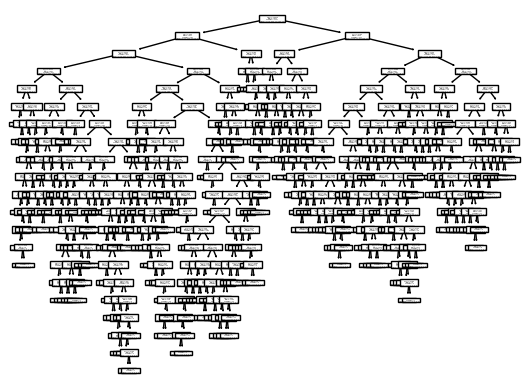

In [128]:
plot_tree(arbol)

In [129]:
# configuramos  la variable que contendra las predicciones utilizando el modelo de árbol de decisión (arbol) entrenado en un conjunto de datos de prueba (X_test).
predicciones = arbol.predict(X_test)

In [130]:
predicciones

array([7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 6, 7, 5, 6, 5, 6,
       6, 5, 7, 6, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6,
       6, 5, 6, 8, 6, 6, 6, 5, 6, 5, 7, 5, 5, 7, 6, 5, 6, 5, 5, 5, 7, 7,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6,
       7, 5, 5, 6, 7, 6, 7, 6, 5, 5, 6, 5, 6, 7, 5, 5, 7, 5, 5, 7, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 7, 6, 6,
       5, 7, 6, 5, 7, 5, 6, 7, 6, 5, 6, 6, 6, 4, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 8, 5, 5, 5, 5, 7,
       5, 5, 6, 5, 7, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 6, 5, 3, 5, 6, 6,
       5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 7, 6, 4, 7, 6, 6, 5, 5, 7, 5,
       5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 5, 3, 7, 7, 5, 6, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 6, 6, 5, 7, 5, 7, 6, 6, 5, 5, 5,

# 6.

In [131]:
# Examinamos la matriz de confusión  para evaluar el rendimiento del modelo
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,1,2,6,2,0,0
5,1,1,126,46,7,0
6,1,2,43,88,17,0
7,0,2,9,11,25,2
8,0,0,1,5,0,0


In [132]:
accuracy = accuracy_score(y_test,predicciones)
print("accuracy", accuracy)
f1 = f1_score(y_test, predicciones, average='weighted')
print("F1-Score:", f1)
recall = recall_score(y_test, predicciones, average='weighted')
print("Recall:", recall)

accuracy 0.6025
F1-Score: 0.5977491689386331
Recall: 0.6025


# 7.

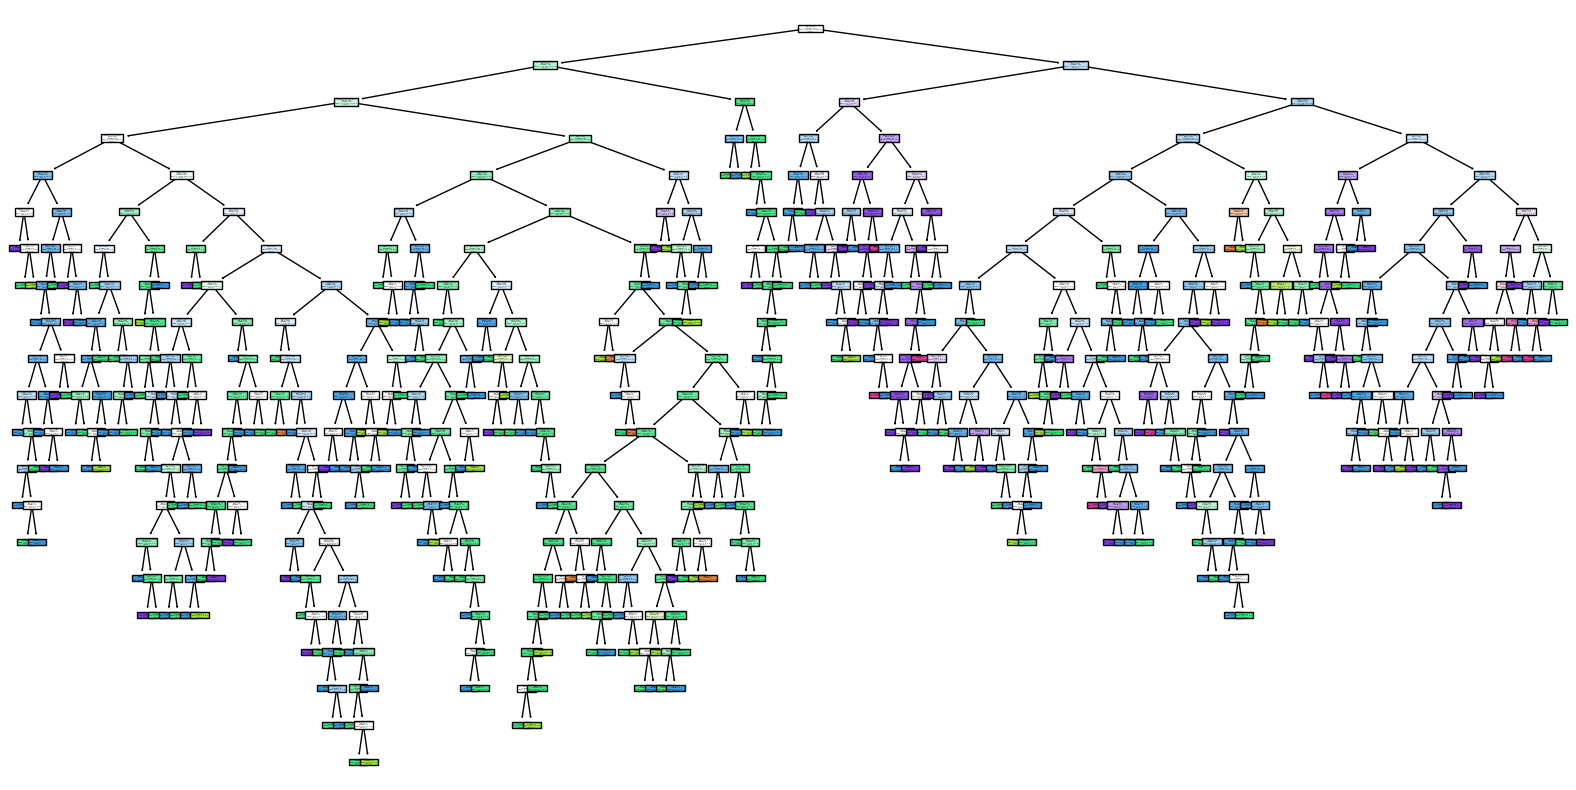

In [141]:
class_names = target['quality'].unique().astype(str)
plt.figure(figsize=(20, 10))
plot_tree(arbol, filled=True, feature_names=predictors_col, class_names=class_names)
plt.show()

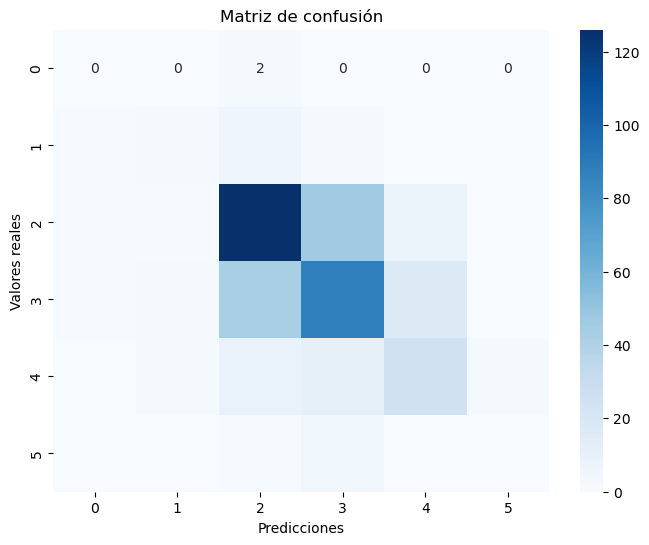

In [142]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

# 8.


Grafica de correlación:
esta grafica nos muestra la correlación de que existen entre las variables, acá tenemos algunas de ellas identificadas.
1. Acidez fija vs. Densidad:
Existe una correlación negativa entre la acidez fija y la densidad. A medida que la acidez fija aumenta, la densidad tiende a disminuir.
2. pH vs. Acidez volátil:
Hay una correlación negativa entre el pH y la acidez volátil. A medida que el pH aumenta, la acidez volátil tiende a disminuir.
3. Azúcar residual vs. Alcohol:
Existe una correlación positiva entre el azúcar residual y el contenido de alcohol. A medida que aumenta el azúcar residual, también tiende a aumentar el contenido de alcohol.
4. Dióxido de azufre libre vs. Dióxido de azufre total:
Hay una correlación positiva entre el dióxido de azufre libre y el dióxido de azufre total. Cuando uno aumenta, el otro también tiende a 
aumentar.
matriz de confusión:
Esta matriz de confusión proporciona información sobre cómo el algoritmo está realizando predicciones en diferentes
 categorías
Predicciones Correctas:
Las categorías 2 y 3 tienen predicciones precisas. Esto se refleja en los cuadrados oscuros en las coordenadas (2,2) y (3,3). Estos valores diagonales representan las predicciones correctas para esa
s categorías.
Errores de Predicción:
Las categorías 0 y 1 parecen tener algunos errores de predicción. Los cuadrados más claros en esas filas/columnas indican que el algoritmo no predijo correctamente esas categorías.
En particular, el cuadrado en la coordenada (1,2) muestra que algunas instancias de la categoría 1 fueron incorrectamente clasificadas como categoría 2.
Distribución de Predicciones:
La categoría 4 tiene un número significativo de predicciones en la fila 4 (coordenadas (4,0) y (4,1)), lo que sugiere que el algoritmo tiende a clasificar instancias como categoría 4.
La categoría 5 tiene una distribución más uniforme en las filas 5 y 6 (coordenadas (5,0), (5,1), (6,0) y (6,1)), lo que indica que el algoritmo no muestra un sesgo claro hacia una categoría específica.
Diagrama de árbol:
esta grafica nos presenta una estructura de árbol conformada por nodos que se interconectan demostrando la relación que existen entre ellos, se puede apreciar un orden jerárquico que existe entre el nodo raíz los nodos padres y los nodos hijos.
métricas:
Accuracy : La precisión es una medida de la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas. en este modelo una precisión del 60.25% significa que el 60.25% de las predicciones realizadas por el modelo fueron correctas.
F1-Score: El F1-Score es una medida que combina la precisión y el recall (sensibilidad) del modelo en una sola métrica. Es útil cuando las clases están desbalanceadas en el conjunto de datos. Un F1-Score del 0.5977 indica un buen equilibrio entre la precisión y el recall del modelo.
Recall: El recall es una medida de la proporción de instancias positivas que fueron correctamente clasificadas por el modelo en este caso el recall es del 60.25% significa que el 60.25% de todas las instancias positivas en el conjunto de datos fueron correctamente identificadas por el modelo.
delo.ífica.
